In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from functools import *

import networkx as nx
import pygsp as pg
import numpy as np
import random
import scipy as sp
from scipy.sparse import csr_matrix
from sklearn.model_selection import ParameterGrid

import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
from math import log
from tqdm import tqdm_notebook, tnrange
import pandas as pd
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc

rc('text', usetex=True)
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command

from GTF.Utilities import *
from GTF.admm import admm

2D GRID GRAPH AND MINNESOTA ROAD GRAPH

[]

[]

[]

[]

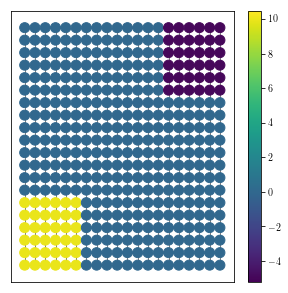

In [2]:
n = 20
G = pg.graphs.Grid2d(n, n)
signal_2d = np.zeros((n, n))
signal_2d[:n / 4 + 1, :n / 4 + 1] = 10
signal_2d[3 * n / 4 - 1:, 3 * n / 4 - 1:] = -5
signal = []

for node in G.coords:
    x, y = node
    signal.append(signal_2d[int(y*n), int(x*n)])

signal = np.array(signal)

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xticks([])
ax.set_yticks([])
pg.plotting.plot_signal(G, signal, plot_name='', ax=ax, colorbar=True)
fig.savefig('2d_grid_graph.pdf', bbox_inches='tight')

[]

[]

[]

[]

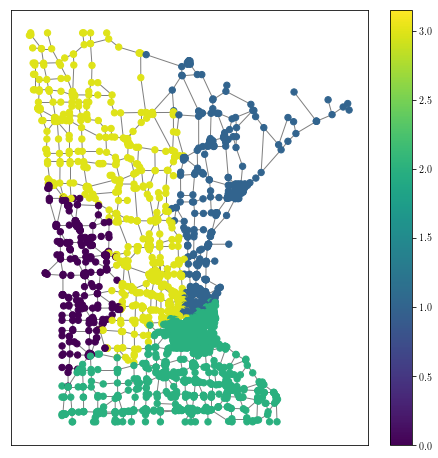

In [3]:
beta_0 = np.load('datasets/minnesota/beta_0.npy')
G = pg.graphs.Minnesota(connect=True)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xticks([])
ax.set_yticks([])
pg.plotting.plot_signal(G, beta_0, plot_name='', ax=ax, colorbar=True)
plt.subplots_adjust(wspace=0, hspace=0)
fig.savefig('minnesota_graph.pdf', bbox_inches='tight')

[]

[]

[]

[]

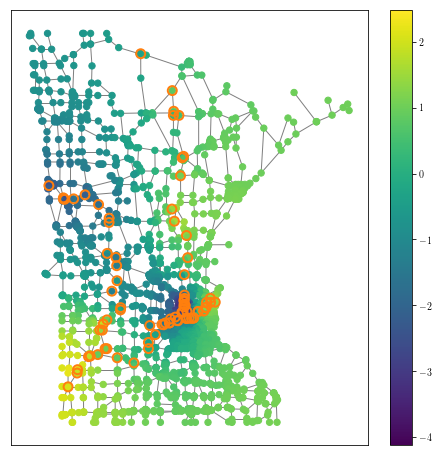

In [4]:
k = 1 
G = pg.graphs.Minnesota(connect=True)
Gnx = nx.from_scipy_sparse_matrix(G.A.astype(float), edge_attribute='weight')

beta_0 = np.load('datasets/minnesota/beta_0.npy')
Dk = penalty_matrix(Gnx, k).toarray()
#print Dk.shape

D = penalty_matrix(Gnx, 0).toarray()
z0 = np.dot(D, beta_0)
z0_edges = np.where(z0)
z0_edges_val = z0[np.where(z0)]

z_nodes = np.where(D[np.where(z0),:])
z_nodes = np.array(z_nodes[-1])
z_nodes = z_nodes[::2]
#print z_nodes.shape

z = np.zeros(Dk.shape[0])
z[z_nodes]=z0_edges_val
#print z[np.where(z)]

Dkinv = np.linalg.pinv(Dk)
beta_1 = np.array(np.dot(Dkinv,z))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xticks([])
ax.set_yticks([])

pg.plotting.plot_signal(G, beta_1/10*2, plot_name='', ax=ax, colorbar=True,highlight=z_nodes)
plt.subplots_adjust(wspace=0, hspace=0)
fig.savefig('minnesota_graph_k1.pdf', bbox_inches='tight')

[]

[]

[]

[]

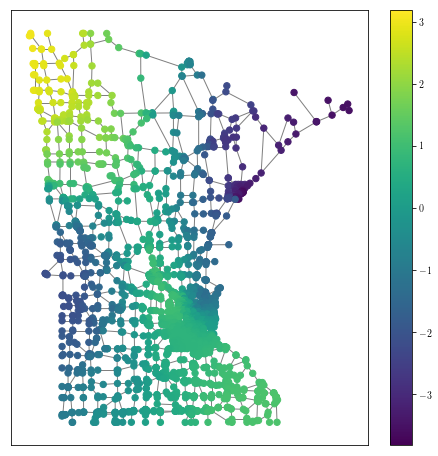

In [5]:
k=2 
G = pg.graphs.Minnesota(connect=True)
Gnx = nx.from_scipy_sparse_matrix(G.A.astype(float), edge_attribute='weight')
beta_0 = np.load('datasets/minnesota/beta_0.npy')

D = penalty_matrix(Gnx, 0).toarray()
z = np.dot(D, beta_0)
#np.where(z)
#z[np.where(z)]
Dk = penalty_matrix(Gnx, k).toarray()
#print Dk.shape
Dkinv = np.linalg.pinv(Dk)
beta_1 = np.array(np.dot(Dkinv,z))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xticks([])
ax.set_yticks([])

pg.plotting.plot_signal(G, beta_1/100, plot_name='', ax=ax, colorbar=True)
plt.subplots_adjust(wspace=0, hspace=0)
fig.savefig('minnesota_graph_k2.pdf', bbox_inches='tight')

DENOISED SIGNAL SNR PLOTS (Fig. 3)

Text(0.5,0,'Noisy Signal SNR (dB)')

Text(0,0.5,'Reconstructed Signal SNR (dB)')

(2, 63)

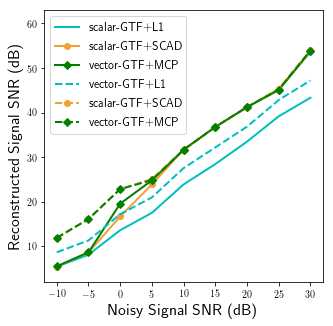

In [6]:
data = np.load('datasets/2d-grid/2d-grid-results.npz') 
x = data['input_snr']

fig = plt.figure(figsize=(5,5))
plt.plot(x,data['L1'],color='c',label='scalar-GTF+L1',linewidth=2)
plt.plot(x,data['SCAD'],color='#f29f3a',marker='o',label='scalar-GTF+SCAD',linewidth=2)
plt.plot(x,data['MCP'],color='g',marker='D',label='vector-GTF+MCP',linewidth=2)
plt.plot(x,data['L1_vec'],color='c', linestyle='--',label='vector-GTF+L1',linewidth=2)
plt.plot(x,data['SCAD_vec'],color='#f29f3a', linestyle='--',marker='o',label='scalar-GTF+SCAD',linewidth=2)
plt.plot(x,data['MCP_vec'],color='g', linestyle='--',marker='D',label='vector-GTF+MCP',linewidth=2)

plt.xlabel('Noisy Signal SNR (dB)',fontsize=16)
plt.ylabel('Reconstructed Signal SNR (dB)',fontsize=16)

plt.legend(fontsize='large')
plt.ylim([2,63])
plt.show()
fig.savefig('snr-2d-grid.pdf',format = 'pdf',bbox_inches='tight')

Text(0.5,0,'Noisy Signal SNR (dB)')

Text(0,0.5,'Reconstructed Signal SNR (dB)')

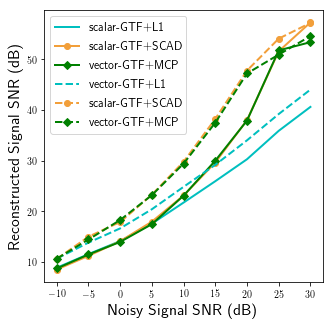

In [7]:
data = np.load('datasets/minnesota/minnesota-results.npz') 
x = data['input_snr']

fig = plt.figure(figsize=(5,5))
plt.plot(x,data['L1'],color='c',label='scalar-GTF+L1',linewidth=2)
plt.plot(x,data['SCAD'],color='#f29f3a',marker='o',label='scalar-GTF+SCAD',linewidth=2)
plt.plot(x,data['MCP'],color='g',marker='D',label='vector-GTF+MCP',linewidth=2)
plt.plot(x,data['L1_vec'],color='c', linestyle='--',label='vector-GTF+L1',linewidth=2)
plt.plot(x,data['SCAD_vec'],color='#f29f3a', linestyle='--',marker='o',label='scalar-GTF+SCAD',linewidth=2)
plt.plot(x,data['MCP_vec'],color='g', linestyle='--',marker='D',label='vector-GTF+MCP',linewidth=2)

plt.xlabel('Noisy Signal SNR (dB)',fontsize=16)
plt.ylabel('Reconstructed Signal SNR (dB)',fontsize=16)

plt.legend(fontsize='large')
plt.show()
fig.savefig('snr-minnesota.pdf',format = 'pdf',bbox_inches='tight')

[  8.63434928 -13.99582188  -0.13787665  -0.08887906   3.44590639
   5.56181577  11.63165499  28.62348345  34.03451123]
[[ 28.5631  22.7698  25.851   35.9384  36.9896  38.5596  37.8389  20.2794
   10.2778]
 [ 21.0854  12.7283  15.573   18.1719  25.6173  40.8312  44.6622  11.1954
   -0.0961]
 [ 32.2577  22.1829  25.4121  35.9338  34.5001  48.6632  60.736   20.2856
   10.3477]
 [ 29.4168  16.8627  25.3651  35.2283  34.2951  48.6804  60.1463  14.9142
   -0.1573]
 [ 32.2577  22.183   25.4121  35.9349  34.5004  48.6633  60.7343  20.2855
   10.3479]
 [ 29.098   21.9673  24.4961  30.2077  32.8982  48.5196  59.946   14.9494
   -0.2005]]


([<matplotlib.axis.XTick at 0x1a1c5e1c50>,
 <a list of 9 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x1a1c5b2690>,
 <a list of 8 Text yticklabel objects>)

Text(0.5,0,'Measurement')

Text(0,0.5,'SNR (dB)')

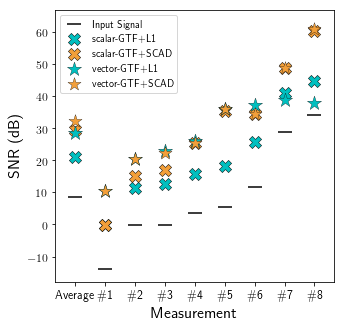

In [8]:
outputfn='datasets/2d-grid/2d-grid-diff-measurements-19-01-19-15-53.csv'
input_snr = pd.read_csv(outputfn, skiprows=3,nrows=1, header=None)
input_snr = input_snr.loc[0,range(8)].values
idx = np.argsort(input_snr)+1
idx = np.array([0] + list(idx))
input_snr = np.array([input_snr.mean()]+list(input_snr))
print input_snr[idx]
snapshots = range(9)
data = pd.read_csv(outputfn, skiprows=5,
                       names=['snapshots', 'penalty_f', 'gamma_mult', 'rho_mult', 'penalty_param', 'mse']
                       + [str(e) for e in range(max(snapshots))])
nums = data.loc[42:47,['mse','0','1','2','3','4','5','6', '7']].values

print nums

#create dataframe:
L1= nums[1, idx]
SCAD= nums[3,idx]
L1_mmv = nums[0, idx]
SCAD_mmv= nums[2,idx]

fig = plt.figure(figsize=(5, 5))

plt.scatter(snapshots, input_snr[idx], s=200, c='k', marker="_", label='Input Signal')
plt.scatter(snapshots, L1, s=150, c='c', marker='X', linewidth=0.5,edgecolor='k', label='scalar-GTF+L1')
plt.scatter(snapshots, SCAD, s=150, c='#f29f3a', marker='X', linewidth=0.5, edgecolor='k',label='scalar-GTF+SCAD')
plt.scatter(snapshots, L1_mmv, s=220, c='c', marker='*', linewidth=0.3, edgecolor='k',label='vector-GTF+L1')
plt.scatter(snapshots, SCAD_mmv, s=190, c='#f29f3a', marker='*', linewidth=0.3, edgecolor='k',label='vector-GTF+SCAD')

plt.xticks(snapshots, ('Average', '\#1', '\#2', '\#3', '\#4', '\#5', '\#6', '\#7', '\#8'), fontsize=12)
plt.yticks(range(-10,61,10),fontsize=12)
plt.xlabel('Measurement', fontsize=16)
plt.ylabel('SNR (dB)', fontsize=16)
plt.legend(fontsize='medium')
plt.grid(b=False)
plt.show()
fig.savefig('snr_diff_measurements_grid.pdf',format = 'pdf',bbox_inches='tight')

[  8.68224439 -14.09098646  -0.08008655   0.21041415   3.54372357
   5.81632234  11.63852087  28.5727716   33.84727562]
[[ 57.4925  50.2471  54.1412  56.328   61.4724  75.0421  76.2431  50.6588
   35.8075]
 [ 53.3229  45.3506  48.3976  50.3767  55.365   72.5023  77.4498  45.4359
   31.7052]
 [ 59.4435  50.5622  54.7123  56.7953  62.1453  79.9899  83.8929  51.1697
   36.2808]
 [ 53.7409  45.3282  48.3962  50.3444  55.8232  74.1596  78.7502  45.4367
   31.6891]
 [ 57.8908  49.062   53.1582  55.1506  60.6314  78.2144  82.3664  49.7743
   34.7691]
 [ 48.4607  40.3271  43.4313  45.2593  50.8063  68.6287  73.7487  39.6475
   25.8366]]


([<matplotlib.axis.XTick at 0x1a1f2a4290>,
 <a list of 9 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x1a1f2a4d10>,
 <a list of 8 Text yticklabel objects>)

Text(0.5,0,'Measurement')

Text(0,0.5,'SNR (dB)')

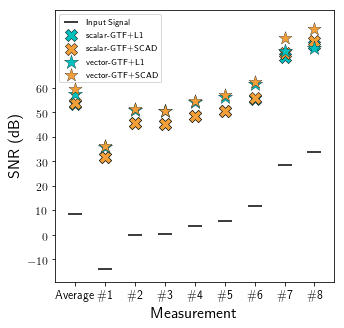

In [9]:
outputfn='datasets/minnesota/minnesota-diff-measurements-19-02-14-23-20.csv'

input_snr = pd.read_csv(outputfn, skiprows=3,nrows=1, header=None)
input_snr = input_snr.loc[0,range(8)].values
idx = np.argsort(input_snr)+1
idx = np.array([0] + list(idx))
input_snr = np.array([input_snr.mean()]+list(input_snr))
print input_snr[idx]
snapshots = range(9)
data = pd.read_csv(outputfn, skiprows=5,
                       names=['snapshots', 'penalty_f', 'gamma_mult', 'rho_mult', 'penalty_param', 'mse']
                       + [str(e) for e in range(max(snapshots))])
nums = data.loc[0:6,['mse','0','1','2','3','4','5','6', '7']].values 

print nums

#create dataframe:
L1= nums[1, idx]
SCAD= nums[3,idx]
L1_mmv = nums[0, idx]
SCAD_mmv= nums[2,idx]

fig = plt.figure(figsize=(5, 5))

plt.scatter(snapshots, input_snr[idx], s=200, c='k', marker="_", label='Input Signal')
plt.scatter(snapshots, L1, s=150, c='c', marker='X', linewidth=0.5,edgecolor='k', label='scalar-GTF+L1')
plt.scatter(snapshots, SCAD, s=150, c='#f29f3a', marker='X', linewidth=0.5, edgecolor='k',label='scalar-GTF+SCAD')

plt.scatter(snapshots, L1_mmv, s=220, c='c', marker='*', linewidth=0.3, edgecolor='k',label='vector-GTF+L1')
plt.scatter(snapshots, SCAD_mmv, s=190, c='#f29f3a', marker='*', linewidth=0.3, edgecolor='k',label='vector-GTF+SCAD')
plt.xticks(snapshots, ('Average', '\#1', '\#2', '\#3', '\#4', '\#5', '\#6', '\#7', '\#8'), fontsize=12)

plt.yticks(range(-10,61,10),fontsize=12)
plt.xlabel('Measurement', fontsize=16)
plt.ylabel('SNR (dB)', fontsize=16)
plt.legend(fontsize='small')
plt.grid(b=False)
plt.show()
fig.savefig('snr_diff_measurements_minnesota.pdf',format = 'pdf',bbox_inches='tight')

BIAS EFFECT TOY EXAMPLE

In [10]:
def create2DSignal(k=0, n=10, Y_HIGH=10, Y_LOW=-5):
    if k == 0:
        signal_2d = np.zeros((n, n))
        signal_2d[:n/4+1, :n/4+1] = Y_HIGH
        signal_2d[3*n/4-1:, 3*n/4-1:] = Y_LOW

    elif k == 1:
        # f = interp2d([0, int(n / 2), n], [0, int(3.0 / 5 * n), n], [[10, 9, 8], [-4, -5, -10], [5, 4, 3]],
        #              kind='linear')
        f = interp2d([0, int(n / 2), n], [0, int(3.0 / 5 * n), n], [[15, 6, 8], [-4, -1, -15], [5, 4, 0]],
                     kind='linear')
        signal_2d = f(np.arange(n), np.arange(n))

    else:
        print "we dont have that yet!"

    return signal_2d

def create2DGraph(n=10, plot_flag=0):
    # Create lattice graph. Thanks networkx.
    G = nx.grid_2d_graph(n, n, periodic=False)
    D = nx.incidence_matrix(G, nodelist=G.nodes(), edgelist=G.edges(), oriented=True, weight='weight').T
    if plot_flag:
        nx.draw_kamada_kawai(G)
        plt.title('Lattice Graph Visualization')
        plt.show()
    return G, D

In [11]:
n = 12
num_nodes = n**2
k = 0
Y_HIGH = 10
Y_LOW = -5

PENALTIES = ['L1', 'MCP']
INPUT_SNR = 5

signal_2d = create2DSignal(k, n, Y_HIGH=Y_HIGH, Y_LOW=Y_LOW)

# Create 2D grid graph and piecewise constant signal on top
G, D = create2DGraph(n, plot_flag=0)
Dk = sparse.csr_matrix(np.identity(num_nodes))
D1 = sparse.csr_matrix(D)
for order in range(k+1):
    Dk = D1.dot(Dk)
    D1 = D1.T

xs = []
ys = []
y_true = []

for node in G.nodes():
    x, y = node
    xs.append(x)
    ys.append(y)

    y_true.append(signal_2d[y, x])

y_true = np.array(y_true)
y_true_norm_sq = np.linalg.norm(y_true, 2) ** 2

sigma_sq = y_true_norm_sq/(10**(INPUT_SNR/10.0))/num_nodes
print sigma_sq
y = y_true + np.random.normal(scale=np.sqrt(sigma_sq), size=num_nodes)
X, Y = np.meshgrid(np.arange(n), np.arange(n))

4.39205230579


L1 4.39205230579 0.878410461158 0
L1 MSE: 
1976.57360902
MCP 4.39205230579 0.878410461158 1.4
MCP MSE: 
2023.50827987


Text(0.5,0.92,'MCP: estimate (surface) and noisy observation (scatter)')

(0.5, 11)

(0, 10.5)

(-8.162514611245248, 12.310752633219609)

[]

[]

[]

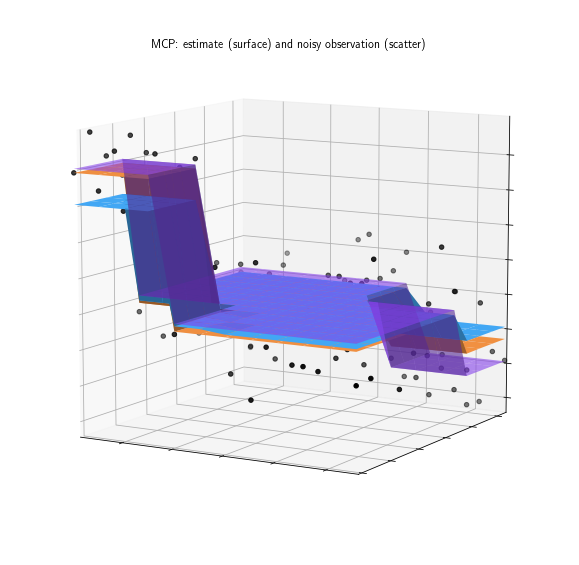

In [12]:
PARAM_GRID = [
    {'penalty_f': ["L1"], 'gamma_ratio': [1.0], 'rho_ratio': [0.2], 'penalty_param': [0]},
    {'penalty_f': ["MCP"], 'gamma_ratio': [1.0], 'rho_ratio': [0.2], 'penalty_param': [1.4]}
]

for params in ParameterGrid(PARAM_GRID):
    penalty_f = params['penalty_f']
    gamma = params['gamma_ratio']*sigma_sq
    penalty_param = params['penalty_param']

    if penalty_f == 'L1':
        l1_beta = None
        rho = params['rho_ratio']*gamma
    else:
        rho = max(params['rho_ratio']*gamma, 1/penalty_param)

    print penalty_f, gamma, rho, penalty_param

    beta, obj, err_path = admm(y.reshape(-1,1), gamma, rho, Dk, penalty_f, penalty_param,max_iter=500, tol_abs=10 ** (-5), 
                               tol_rel=10 ** (-4), B_init=l1_beta)

    if penalty_f == 'L1':
        l1_beta = beta

    print penalty_f, 'MSE: '
    print (np.linalg.norm(beta - y_true, 2) ** 2) / len(beta)

    beta_2d = np.zeros((n, n))
    for ii in range(len(beta)):
        beta_2d[ys[ii], xs[ii]] = beta[ii]
    if penalty_f == 'L1':
        l1_2d = beta_2d

    if penalty_f =='MCP':
        # 3D plot of estimated signal and noisy observation.
        fig = plt.figure(figsize=(10,10))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(X, Y, signal_2d, color='#8541ea', shade=True, alpha=0.6, zorder=10)
        ax.plot_surface(X, Y, l1_2d, color='#42a7f4', shade=True, alpha=1, zorder=0)
        ax.plot_surface(X, Y, beta_2d, color='#f49242', shade=True, alpha=1, zorder=5) #cmap=cm.coolwarm,
        ax.scatter(xs, ys, y, c=['k'] * len(y), zorder=1)
        plt.title(penalty_f+': estimate (surface) and noisy observation (scatter)')
        ax.view_init(10, 300)
        ax.set_xlim(0.5, n - 1)
        ax.set_ylim(0, n - 1.5)
        ax.set_zlim(min(y), max(y))
        ax.set_zticklabels([])
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

IMPORT SEABORN

In [13]:
import seaborn as sns
print(sns.__version__)

0.9.0


In [14]:
sns.set(rc={'text.usetex' : True, 'text.latex.preamble' : r'\usepackage{amsmath}'})
#sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
plt.rcParams['figure.figsize']=(5,5)

PENALTY FUNCTIONS

In [15]:
from GTF.Penalty import *
gamma = 2
a = 3.7
b = 1.4
l1_prox = L1Penalty()
scad_prox = SCADPenalty(3.7)
mcp_prox = MCPPenalty(1.4)
x = np.linspace(-10, 10, 17)
l1_y = []
scad_y = []
mcp_y = []

for v in x:
    l1_y.append(l1_prox.calculate(v, gamma))
    scad_y.append(scad_prox.calculate(v, gamma))
    mcp_y.append(mcp_prox.calculate(v, gamma))
    
#create dataframe:
df = pd.DataFrame({'x':x, 'L1':l1_y, 'SCAD': scad_y, 'MCP': mcp_y})
df = pd.melt(df, id_vars = ['x'], value_vars = ['L1','SCAD','MCP'], 
       var_name = 'penalty', value_name = 'y')

In [16]:
df = pd.DataFrame({'x':x, 'L1':l1_y, 'SCAD': scad_y, 'MCP': mcp_y})
df = pd.melt(df, id_vars = ['x'], value_vars = ['L1','SCAD','MCP'], 
       var_name = 'penalty', value_name = 'y')

[Text(0,0.5,'$\\rho(t;\\lambda,\\gamma)$'), Text(0.5,0,'$t$')]

[Text(0.5,1,'Penalty Functions')]

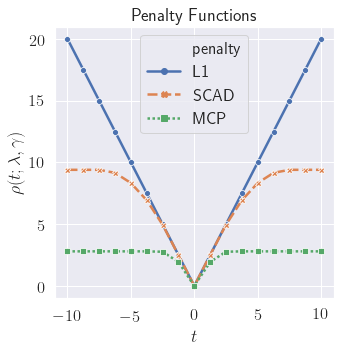

In [17]:
#sns.set_style("darkgrid",{"xtick.major.size":8,
#"ytick.major.size":8})
fig = plt.figure(1)
g= sns.lineplot(x='x', y='y',
             hue='penalty',style = 'penalty',markers=True,
             data=df)
g.set(xlabel = r'$t$', ylabel = r'$\rho(t;\lambda,\gamma)$')
g.set(title = "Penalty Functions")
#g.set_axis_labels(r't',r'blah' )
plt.show(g)
fig = g.get_figure()
fig.savefig('penfuns.pdf', format = 'pdf', bbox_inches='tight')